# Exploratory Data Analysis (EDA)

In this notebook, we will perform exploratory data analysis on the sleep health and lifestyle dataset. The goal is to understand the dataset better, visualize key features, and identify patterns that may be relevant for disorder detection.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

In [2]:
# Install dependencies as needed:
# pip install 'kagglehub[pandas-datasets]'
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Sleep_health_and_lifestyle_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uom190346a/sleep-health-and-lifestyle-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/rt/cvtcks993t1d0wyxbjq9zs740000gn/T/ipykernel_38905/2531040569.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80 

In [3]:
# Summary statistics
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
# Transform NaN values in 'Sleep Disorder' column to "Normal"
df['Sleep Disorder'] = df['Sleep Disorder'].where(df['Sleep Disorder'].notna(), "Normal")

print("First 5 records:", df.head())

First 5 records:    Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200         Normal  
1         125/80 

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

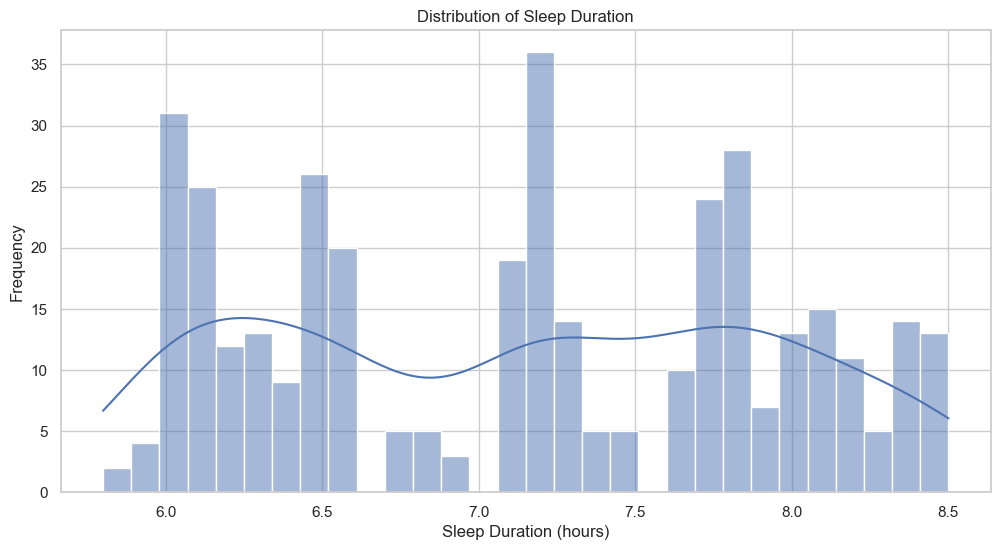

In [6]:
# Visualize the distribution of key features
plt.figure(figsize=(12, 6))
sns.histplot(df['Sleep Duration'], bins=30, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

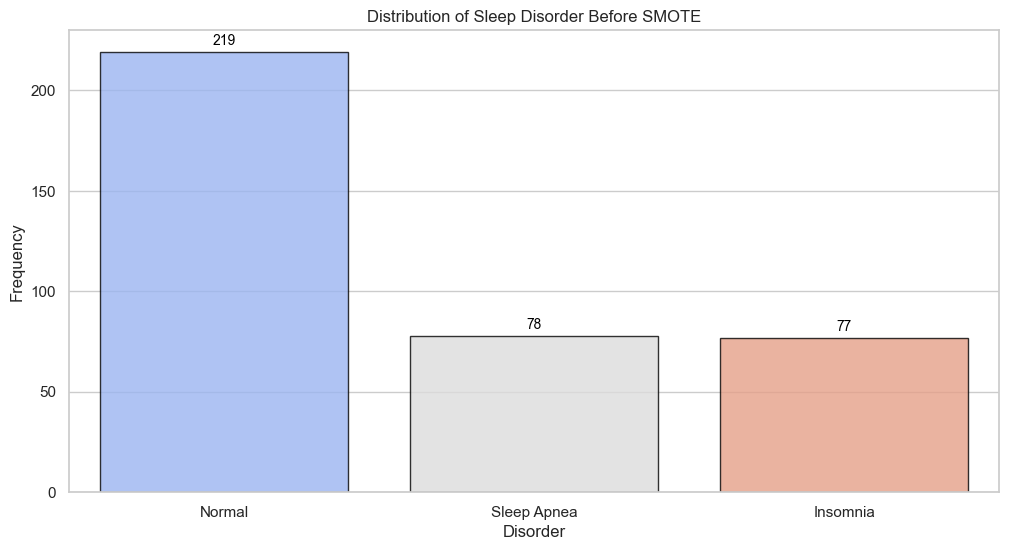

In [ ]:
# Visualize the distribution of key features
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=df['Sleep Disorder'].value_counts().index,
    y=df['Sleep Disorder'].value_counts().values,
    hue=df['Sleep Disorder'].value_counts().index,
    palette='coolwarm',
    legend=False,
    alpha=0.8,
    edgecolor='black'
)
plt.title('Distribution of Sleep Disorder BEFORE SMOTE')
plt.xlabel('Disorder')
plt.ylabel('Frequency')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

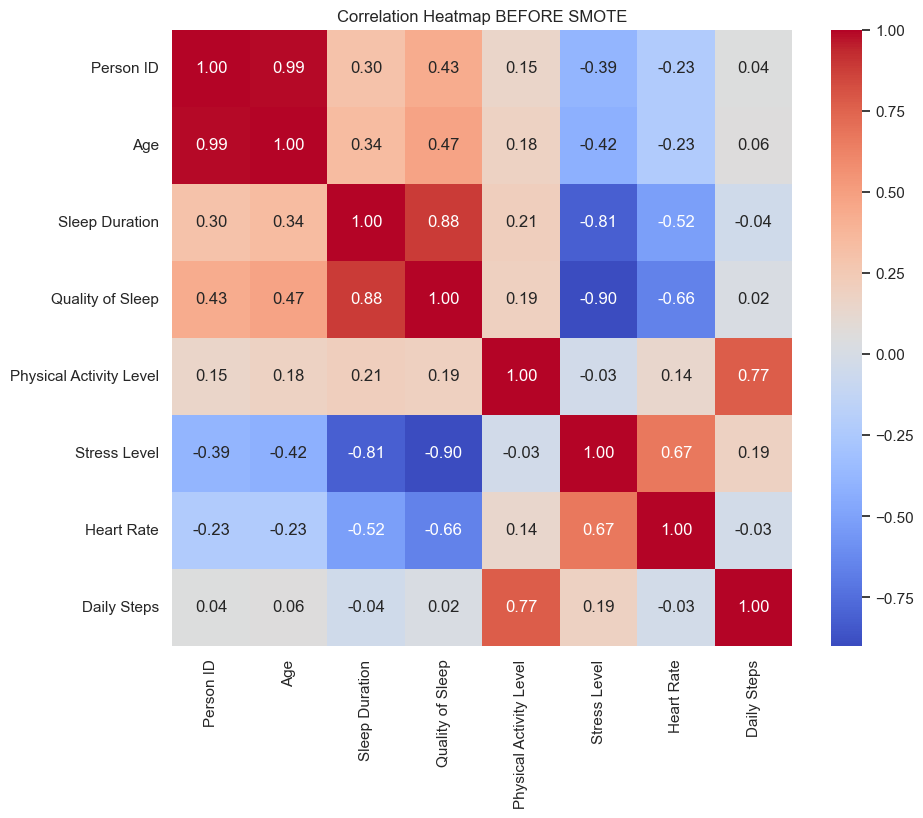

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Only select numeric columns for correlation
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap BEFORE SMOTE')
plt.show()

In [11]:
%pip install imblearn
from imblearn.over_sampling import SMOTE

# Select features and target for SMOTE
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# For categorical columns, encode them before SMOTE
X_encoded = pd.get_dummies(X, drop_first=True)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Create a new DataFrame with resampled data
df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns), pd.Series(y_resampled, name='Sleep Disorder')], axis=1)

print("Class distribution after SMOTE:")
print(df_smote['Sleep Disorder'].value_counts())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 4.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [imblearn]1/4 [sklearn-compat]
Note: you may need to restart the kernel to use updated packages.
Class distribution after SMOTE:
Sleep Disorder
Normal         219
Sleep Apnea    219
Insomnia       219
Name: count, dtype: int64


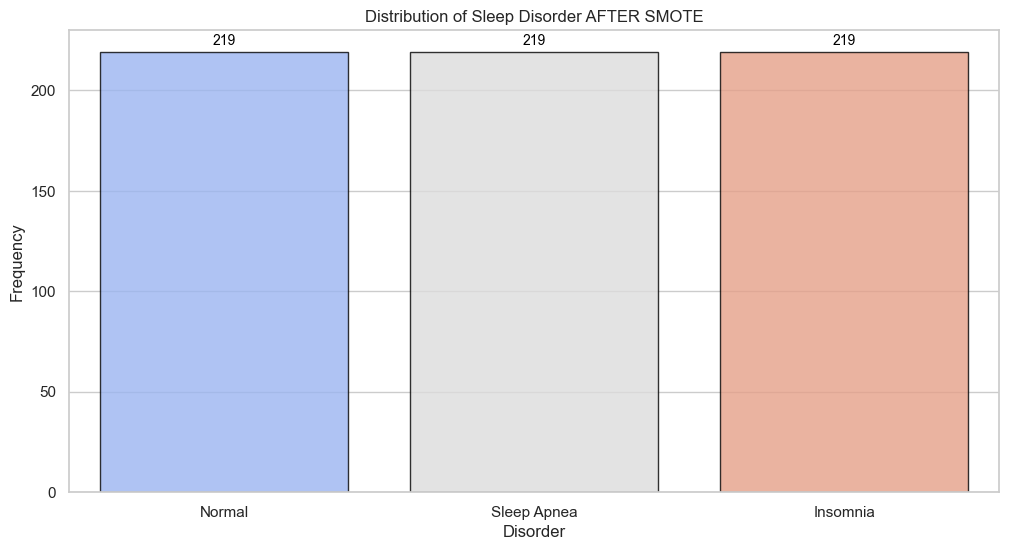

In [12]:
# Visualize the distribution of key features
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=df_smote['Sleep Disorder'].value_counts().index,
    y=df_smote['Sleep Disorder'].value_counts().values,
    hue=df_smote['Sleep Disorder'].value_counts().index,
    palette='coolwarm',
    legend=False,
    alpha=0.8,
    edgecolor='black'
)
plt.title('Distribution of Sleep Disorder AFTER SMOTE')
plt.xlabel('Disorder')
plt.ylabel('Frequency')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

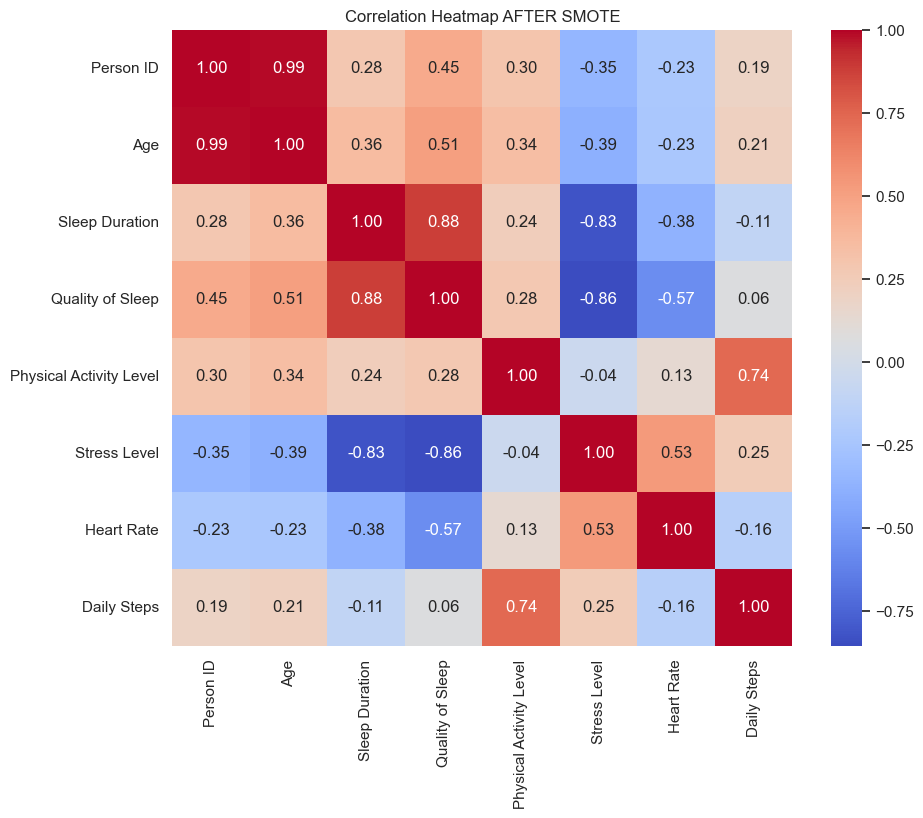

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Only select numeric columns for correlation
correlation_matrix = df_smote.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap AFTER SMOTE')
plt.show()

[[26  1  2]
 [ 2 50  0]
 [ 1  2 48]]
              precision    recall  f1-score   support

    Insomnia       0.90      0.90      0.90        29
      Normal       0.94      0.96      0.95        52
 Sleep Apnea       0.96      0.94      0.95        51

    accuracy                           0.94       132
   macro avg       0.93      0.93      0.93       132
weighted avg       0.94      0.94      0.94       132

Accuracy:  0.9393939393939394
Precision:  0.9395197255574614
Sensitivity_recall:  0.9393939393939394
Specificity:  None
F1_score:  0.9393867958224393


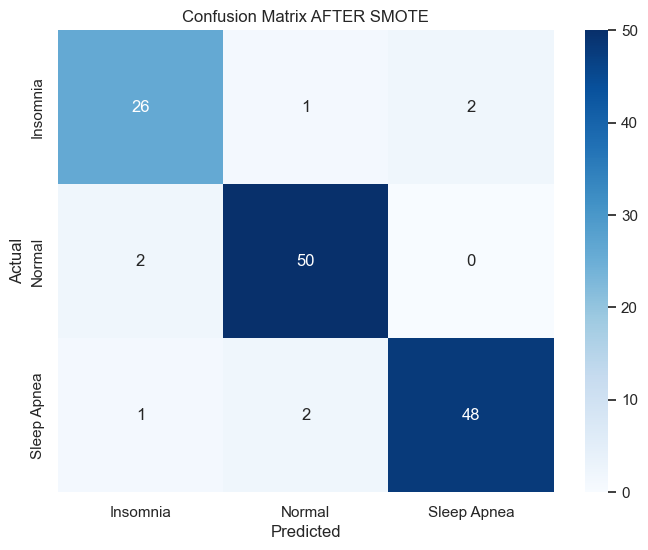

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../data/Sleep_health_and_lifestyle_dataset.csv'
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df):
    # Example preprocessing steps
    # Transform NaN values in 'Sleep Disorder' column to "Normal"
    df['Sleep Disorder'] = df['Sleep Disorder'].where(df['Sleep Disorder'].notna(), "Normal")
    df = df.dropna()  # Remove missing values
    X = df.drop('Sleep Disorder', axis=1)  # Features
    y = df['Sleep Disorder']  # Target variable
    X = pd.get_dummies(X)  # Convert categorical columns to numeric
    return X, y

def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

def save_model(model, filename):
    joblib.dump(model, filename)

def main():
    #filepath = '../data/Sleep_health_and_lifestyle_dataset.csv'  # Update with your dataset path
    #df = load_data(file_path)
    X, y = preprocess_data(df_smote)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = train_model(X_train, y_train)
    save_model(model, 'disorder_detection_model.pkl')
    
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
  
    # Calculate metrics
    Precision = precision_score(y_test, y_pred, average='weighted')
    Sensitivity_recall = recall_score(y_test, y_pred, average='weighted')
    # For multiclass, specificity is not directly available; here is a workaround for binary classification:
    if len(model.classes_) == 2:
        Specificity = recall_score(y_test, y_pred, pos_label=model.classes_[0])
    else:
        Specificity = None
    F1_score = f1_score(y_test, y_pred, average='weighted')
    Accuracy = accuracy_score(y_test, y_pred)


    #metrics
    print("Accuracy: ",Accuracy)
    print("Precision: ",Precision)
    print("Sensitivity_recall: ",Sensitivity_recall)
    print("Specificity: ",Specificity)
    print("F1_score: ",F1_score)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix AFTER SMOTE')
    #plt.show()
    plt.savefig('confusion_matrix_after_smote.png')

if __name__ == "__main__":
    main()

In [19]:
!cd /Users/krittima/Library/CloudStorage/OneDrive-CharoenPokphandFoodsGroup/AI/disorder-detection-classification/src

#!python3 /Users/krittima/Library/CloudStorage/OneDrive-CharoenPokphandFoodsGroup/AI/disorder-detection-classification/src/model_training_evaluate.py
# To run a Python script from a Jupyter notebook cell, use the ! (bang) operator followed by the command.
# For example, to run model_training.py:
!python3 /Users/krittima/Library/CloudStorage/OneDrive-CharoenPokphandFoodsGroup/AI/disorder-detection-classification/src/model_training.py

[[13  1  2]
 [ 1 42  0]
 [ 4  1 11]]
              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
      Normal       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Accuracy:  0.88
Precision:  0.8818596218596219
Sensitivity_recall:  0.88
Specificity:  None
F1_score:  0.8785395537525356


## Conclusion

In this notebook, we have performed exploratory data analysis on the sleep health and lifestyle dataset. We visualized the distribution of sleep duration and examined the correlation between different features. Further analysis can be conducted to identify specific patterns related to disorder detection.